Things to do with SHAP 
- Apply Lemmatization 
- Remove words such as "also" in addition to stop words
- Successfully apply SHAP and build an argument. Improve working on SHAP 
- Compare the SHAP value with the set of tweets for which there is complete agreement
- Apply spearmen rank correlation to check which set of tweets is more aligned with “Sad” subset
- Key Findings: SHAP is an interesting tool for studying inter-annotator disagreement 
- Use SHAP force plot



In [1]:
pip install nltk

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger_eng')  # For pos_tag
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /Users/msawant/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/msawant/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/msawant/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /Users/msawant/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /Users/msawant/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
import pandas as pd
import numpy as np
from nltk.tokenize import word_tokenize
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.base import TransformerMixin, BaseEstimator
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix,f1_score, precision_score, recall_score

In [4]:
import pandas as pd
#file_path = "EXIST_2023/disagreement_records_task1.xlsx"

file_path_a1="EXIST_2023/age1_disagreement_records.xlsx"
file_path_a2="EXIST_2023/age2_disagreement_records.xlsx"
file_path_a3="EXIST_2023/age3_disagreement_records.xlsx"


#file_path = "EXIST_2023/EXIST2023_Task1_en.xlsx"
data_a1 = pd.read_excel(file_path_a1)
data_a2 = pd.read_excel(file_path_a2)
data_a3 = pd.read_excel(file_path_a3)


In [5]:
import re

def remove_urls_and_lower(text):
    # Define the regex pattern for URLs starting with http or https
    url_pattern = re.compile(r'http[s]?://\S+')
    # Substitute the URLs with an empty string
    cleaned_text = url_pattern.sub('', text)
    cleaned_text = cleaned_text.lower()
    return cleaned_text.strip()

In [6]:
def clean_text(text):
    return re.sub(r'[^A-Za-z\s]', '', text) if isinstance(text, str) else text
    #return re.sub(r'[^A-Za-z0-9\s]', '', text) if isinstance(text, str) else text

In [7]:
from nltk.corpus import stopwords
stop_words=set(stopwords.words('english'))
#additional_stopwords={'ago','also','along','always','amp','like','look','know','even','want','say','get','far','use','take','never','great','whole','know','even','use','take','would'}
stop_words.update(['ago','also','along','always','amp','like','look','know','even','want','say','get','far','use','take','never','great','whole','would','ok','dont','cant','shes','theyre','without','youre','isnt','us','yet','yall','u','id'])
#stop_words.update(['ago','also','along','always','amp','like','look','know','even','want','say','get','far','use','take','never','great','whole','would','ok','dont','cant','shes','theyre','without','youre','id','call','make'])
def stopwords_removal(text):
    words=word_tokenize(text)
    filtered_words=[w for w in words if w.lower() not in stop_words]
    return ' '.join(filtered_words)

In [8]:
from nltk.corpus import wordnet
def pos_tagger(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:          
        return None

In [9]:
from nltk.stem import WordNetLemmatizer
def apply_lemmatization(text):
    pos_tagged = nltk.pos_tag(nltk.word_tokenize(text))  
    wordnet_tagged = list(map(lambda x: (x[0], pos_tagger(x[1])), pos_tagged))
    lemmatizer = WordNetLemmatizer()
    lemmatized_sentence = []
    for word, tag in wordnet_tagged:
        if tag is None:
            # if there is no available tag, append the token as is
            lemmatized_sentence.append(word)
        else:        
        # else use the tag to lemmatize the token
            lemmatized_sentence.append(lemmatizer.lemmatize(word, tag))
    lemmatized_sentence = " ".join(lemmatized_sentence)
    return lemmatized_sentence

Age1

In [10]:
tweet_processed_a1=data_a1["tweet"].apply(remove_urls_and_lower)
tweet_processed_a1=tweet_processed_a1.apply(clean_text)
tweet_processed_a1=tweet_processed_a1.apply(apply_lemmatization)
tweet_processed_a1=tweet_processed_a1.apply(stopwords_removal)

In [11]:
vec_a1=TfidfVectorizer(tokenizer=word_tokenize,token_pattern=None,ngram_range=(1,1))
tweet_vectorized_a1=vec_a1.fit_transform(tweet_processed_a1)

In [12]:
X_train_a1, X_test_a1, y_train_a1, y_test_a1 = train_test_split(tweet_vectorized_a1,data_a1["majority_vote"], test_size=0.30, random_state=0)

In [13]:
rf_model_a1=RandomForestClassifier(bootstrap=False, min_samples_leaf=4,min_samples_split=10,n_estimators=100,n_jobs=-1,random_state=10)
rf_model_a1.fit(X_train_a1, y_train_a1)

RandomForestClassifier(bootstrap=False, min_samples_leaf=4,
                       min_samples_split=10, n_jobs=-1, random_state=10)

In [14]:
y_pred_rf_a1 =rf_model_a1.predict(X_test_a1)
y_pred_rf_a1 = y_pred_rf_a1.astype(int)
accuracy= accuracy_score(y_test_a1,y_pred_rf_a1)
print("Age1 disagreement subset")
print("ACCURACY OF THE MODEL:", metrics.accuracy_score(y_test_a1, y_pred_rf_a1))
f1=f1_score(y_test_a1,y_pred_rf_a1,average='macro')
print(f"F1 score:{f1}")

# Calculate Precision and Recall
precision = precision_score(y_test_a1, y_pred_rf_a1, average='macro')
recall = recall_score(y_test_a1, y_pred_rf_a1, average='macro')

print(f'Precision: {precision}')
print(f'Recall: {recall}')

Age1 disagreement subset
ACCURACY OF THE MODEL: 0.7711213517665131
F1 score:0.43538594969644406
Precision: 0.3861538461538462
Recall: 0.4990059642147117


In [15]:
target_names = ['Yes','No']
print(classification_report(y_test_a1, y_pred_rf_a1, target_names=target_names))

              precision    recall  f1-score   support

         Yes       0.77      1.00      0.87       503
          No       0.00      0.00      0.00       148

    accuracy                           0.77       651
   macro avg       0.39      0.50      0.44       651
weighted avg       0.60      0.77      0.67       651



Age2

In [16]:
tweet_processed_a2=data_a2["tweet"].apply(remove_urls_and_lower)
tweet_processed_a2=tweet_processed_a2.apply(clean_text)
tweet_processed_a2=tweet_processed_a2.apply(apply_lemmatization)
tweet_processed_a2=tweet_processed_a2.apply(stopwords_removal)

In [17]:
vec_a2=TfidfVectorizer(tokenizer=word_tokenize,token_pattern=None,ngram_range=(1,1))
tweet_vectorized_a2=vec_a2.fit_transform(tweet_processed_a2)

In [18]:
X_train_a2, X_test_a2, y_train_a2, y_test_a2 = train_test_split(tweet_vectorized_a2,data_a2["majority_vote"], test_size=0.30, random_state=0)

In [19]:
rf_model_a2=RandomForestClassifier(bootstrap=False, min_samples_leaf=4,min_samples_split=10,n_estimators=100,n_jobs=-1,random_state=10)
rf_model_a2.fit(X_train_a2, y_train_a2)

RandomForestClassifier(bootstrap=False, min_samples_leaf=4,
                       min_samples_split=10, n_jobs=-1, random_state=10)

In [52]:
y_pred_rf_a2 =rf_model_a2.predict(X_test_a2)
y_pred_rf_a2 = y_pred_rf_a2.astype(int)
accuracy= accuracy_score(y_test_a2,y_pred_rf_a2)
print("Disagreement subset for Age2")
print("ACCURACY OF THE MODEL:", metrics.accuracy_score(y_test_a2, y_pred_rf_a2))
f1=f1_score(y_test_a2,y_pred_rf_a2,average='macro')
print(f"F1 score:{f1}")

# Calculate Precision and Recall
precision = precision_score(y_test_a2, y_pred_rf_a2, average='macro')
recall = recall_score(y_test_a2, y_pred_rf_a2, average='macro')

print(f'Precision: {precision}')
print(f'Recall: {recall}')

Disagreement subset for Age2
ACCURACY OF THE MODEL: 0.7403993855606759
F1 score:0.4987676369153109
Precision: 0.684908293460925
Recall: 0.5334033613445378


In [21]:
target_names = ['Yes','No']
print(classification_report(y_test_a2, y_pred_rf_a2, target_names=target_names))

              precision    recall  f1-score   support

         Yes       0.74      0.98      0.85       476
          No       0.62      0.09      0.15       175

    accuracy                           0.74       651
   macro avg       0.68      0.53      0.50       651
weighted avg       0.71      0.74      0.66       651



Age3

In [22]:
tweet_processed_a3=data_a3["tweet"].apply(remove_urls_and_lower)
tweet_processed_a3=tweet_processed_a3.apply(clean_text)
tweet_processed_a3=tweet_processed_a3.apply(apply_lemmatization)
tweet_processed_a3=tweet_processed_a3.apply(stopwords_removal)

In [23]:
vec_a3=TfidfVectorizer(tokenizer=word_tokenize,token_pattern=None,ngram_range=(1,1))
tweet_vectorized_a3=vec_a3.fit_transform(tweet_processed_a3)

In [24]:
X_train_a3, X_test_a3, y_train_a3, y_test_a3 = train_test_split(tweet_vectorized_a3,data_a3["majority_vote"], test_size=0.30, random_state=0)

In [25]:
rf_model_a3=RandomForestClassifier(bootstrap=False, min_samples_leaf=4,min_samples_split=10,n_estimators=100,n_jobs=-1,random_state=10)
rf_model_a3.fit(X_train_a3, y_train_a3)

RandomForestClassifier(bootstrap=False, min_samples_leaf=4,
                       min_samples_split=10, n_jobs=-1, random_state=10)

In [ ]:
y_pred_rf_a3 =rf_model_a3.predict(X_test_a3)
y_pred_rf_a3 = y_pred_rf_a3.astype(int)
accuracy= accuracy_score(y_test_a3,y_pred_rf_a3)
print("Disagreement subset for Age3")
print("ACCURACY OF THE MODEL:", metrics.accuracy_score(y_test_a3, y_pred_rf_a3))
f1=f1_score(y_test_a3,y_pred_rf_a3,average='macro')
print(f"F1 score:{f1}")

# Calculate Precision and Recall
precision = precision_score(y_test_a3, y_pred_rf_a3, average='macro')
recall = recall_score(y_test_a3, y_pred_rf_a3, average='macro')

print(f'Precision: {precision}')
print(f'Recall: {recall}')

Agreement subset
ACCURACY OF THE MODEL: 0.7188940092165899
F1 score:0.47848640981977525
Precision: 0.6234185303514377
Recall: 0.5224781212177637


In [27]:
target_names = ['Yes','No']
print(classification_report(y_test_a3, y_pred_rf_a3, target_names=target_names))

              precision    recall  f1-score   support

         Yes       0.73      0.97      0.83       467
          No       0.52      0.07      0.12       184

    accuracy                           0.72       651
   macro avg       0.62      0.52      0.48       651
weighted avg       0.67      0.72      0.63       651



SHAP

In [28]:
%pip install shap

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [29]:
import tqdm

In [30]:
import shap

/Users/msawant/Library/Python/3.9/lib/python/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [31]:
pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [32]:
import matplotlib.pyplot as plt

shap for age1

In [33]:
features_a1=vec_a1.get_feature_names_out()
#feature_importances_a = rf_model_a.feature_importances_
importances_a1 = pd.DataFrame(index=features_a1)
#importances_a['importance'] = feature_importances_a
#importances_a['rank'] = importances_a['importance'].rank(ascending=False).values
#importances_a.sort_values('rank').head(10)

In [34]:
explainer_a1 = shap.TreeExplainer(rf_model_a1, X_train_a1.toarray())

In [35]:
# Get Shap values (extended version has other data returned as well as shap values)
shapley_values_train_extended = explainer_a1(X_train_a1.toarray(), check_additivity=False)
shapley_values_train_a1 = shapley_values_train_extended.values[:,:,1]
shapley_values_test_extended = explainer_a1(X_test_a1.toarray(), check_additivity=False)
shapley_values_test_a1 = shapley_values_test_extended.values[:,:,1]

# Calculate mean Shapley value for each feature in trainign set
importances_a1['mean_shapley_values'] = np.mean(shapley_values_train_a1, axis=0)

# Calculate mean absolute Shapley value for each feature in trainign set
# This will give us the average importance of each feature
importances_a1['mean_abs_shapley_values'] = np.mean(np.abs(shapley_values_train_a1),axis=0)

 97%|=================== | 1263/1302 [00:24<00:00]       

In [36]:
# Get top 10 features
#importance_top_a = importances_a.sort_values(by='importance', ascending=False).head(15).index
shapley_top_a1 = importances_a1.sort_values(by='mean_abs_shapley_values', ascending=False).head(10).index

# Add to DataFrame
top_features_a1 = pd.DataFrame()
#top_features_a['importances'] = importance_top_a.values
top_features_a1['Shapley'] = shapley_top_a1.values

# Display
top_features_a1

,Shapley
0,woman
1,tit
2,call
3,last
4,gangbanged
5,sex
6,dude
7,need
8,sexist
9,anymore


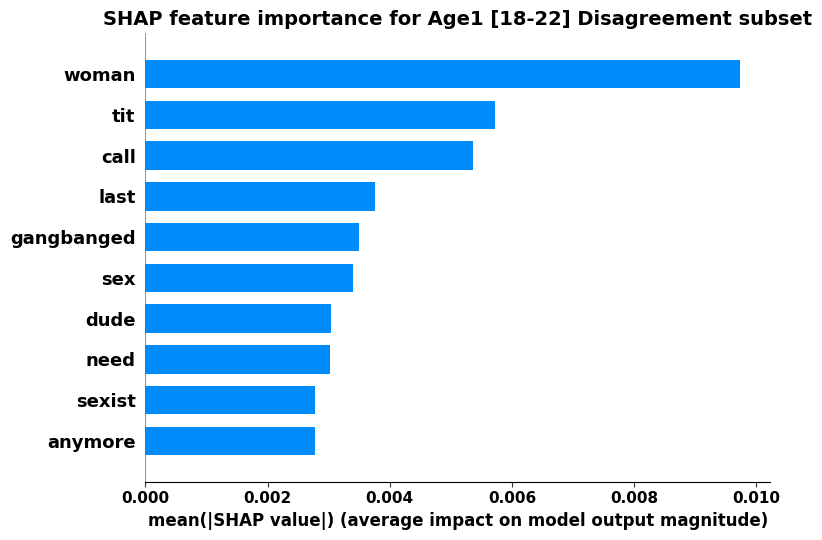

In [37]:
fig = plt.figure(figsize=(6,6))

shap.summary_plot(shap_values = shapley_values_train_a1, 
                  features = X_train_a1.toarray(),
                  feature_names = vec_a1.get_feature_names_out(),
                  plot_type='bar',
                  max_display=10,
                  show=False)
plt.title("SHAP feature importance for Age1 [18-22] Disagreement subset", fontsize=14, color='black', fontweight='bold')
plt.xlabel("mean(|SHAP value|) (average impact on model output magnitude)", fontsize=12, color='black', fontweight='bold')
plt.xticks(color='black', fontweight='bold')
plt.yticks(color='black', fontweight='bold')
plt.tight_layout()
plt.show()

Age2 

In [38]:
features_a2=vec_a2.get_feature_names_out()
#feature_importances_a = rf_model_a.feature_importances_
importances_a2 = pd.DataFrame(index=features_a2)
#importances_a['importance'] = feature_importances_a
#importances_a['rank'] = importances_a['importance'].rank(ascending=False).values
#importances_a.sort_values('rank').head(10)

In [39]:
explainer_a2 = shap.TreeExplainer(rf_model_a2, X_train_a2.toarray())

In [40]:
# Get Shap values (extended version has other data returned as well as shap values)
shapley_values_train_extended = explainer_a2(X_train_a2.toarray(), check_additivity=False)
shapley_values_train_a2 = shapley_values_train_extended.values[:,:,1]
shapley_values_test_extended = explainer_a2(X_test_a2.toarray(), check_additivity=False)
shapley_values_test_a2 = shapley_values_test_extended.values[:,:,1]

# Calculate mean Shapley value for each feature in trainign set
importances_a2['mean_shapley_values'] = np.mean(shapley_values_train_a2, axis=0)

# Calculate mean absolute Shapley value for each feature in trainign set
# This will give us the average importance of each feature
importances_a2['mean_abs_shapley_values'] = np.mean(np.abs(shapley_values_train_a2),axis=0)

 96%|=================== | 1253/1302 [00:24<00:00]       

In [41]:
# Get top 10 features
#importance_top_a = importances_a.sort_values(by='importance', ascending=False).head(15).index
shapley_top_a2 = importances_a2.sort_values(by='mean_abs_shapley_values', ascending=False).head(10).index

# Add to DataFrame
top_features_a2 = pd.DataFrame()
#top_features_a['importances'] = importance_top_a.values
top_features_a2['Shapley'] = shapley_top_a2.values

# Display
top_features_a2

,Shapley
0,woman
1,sexist
2,long
3,experience
4,doesnt
5,girl
6,men
7,bitch
8,anyone
9,bc


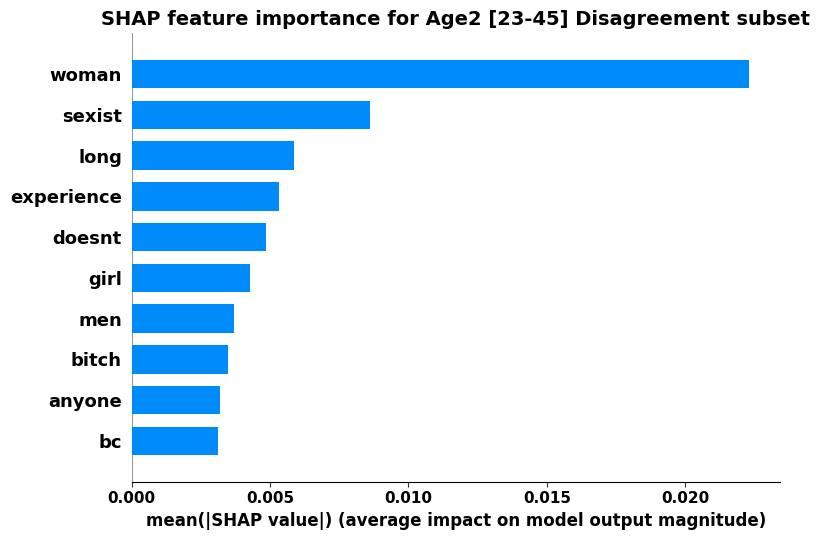

In [42]:
fig = plt.figure(figsize=(6,6))

shap.summary_plot(shap_values = shapley_values_train_a2, 
                  features = X_train_a2.toarray(),
                  feature_names = vec_a2.get_feature_names_out(),
                  plot_type='bar',
                  max_display=10,
                  show=False)
plt.title("SHAP feature importance for Age2 [23-45] Disagreement subset", fontsize=14, color='black', fontweight='bold')
plt.xlabel("mean(|SHAP value|) (average impact on model output magnitude)", fontsize=12, color='black', fontweight='bold')
plt.xticks(color='black', fontweight='bold')
plt.yticks(color='black', fontweight='bold')
plt.tight_layout()
plt.show()

Age3

In [43]:
features_a3=vec_a3.get_feature_names_out()
#feature_importances_a = rf_model_a.feature_importances_
importances_a3 = pd.DataFrame(index=features_a3)
#importances_a['importance'] = feature_importances_a
#importances_a['rank'] = importances_a['importance'].rank(ascending=False).values
#importances_a.sort_values('rank').head(10)

In [44]:
explainer_a3 = shap.TreeExplainer(rf_model_a3, X_train_a3.toarray())

In [45]:
# Get Shap values (extended version has other data returned as well as shap values)
shapley_values_train_extended = explainer_a3(X_train_a3.toarray(), check_additivity=False)
shapley_values_train_a3 = shapley_values_train_extended.values[:,:,1]
shapley_values_test_extended = explainer_a3(X_test_a3.toarray(), check_additivity=False)
shapley_values_test_a3 = shapley_values_test_extended.values[:,:,1]

# Calculate mean Shapley value for each feature in trainign set
importances_a3['mean_shapley_values'] = np.mean(shapley_values_train_a3, axis=0)

# Calculate mean absolute Shapley value for each feature in trainign set
# This will give us the average importance of each feature
importances_a3['mean_abs_shapley_values'] = np.mean(np.abs(shapley_values_train_a3),axis=0)

 99%|===================| 1293/1302 [00:24<00:00]        

In [46]:
# Get top 10 features
#importance_top_a = importances_a.sort_values(by='importance', ascending=False).head(15).index
shapley_top_a3 = importances_a3.sort_values(by='mean_abs_shapley_values', ascending=False).head(10).index

# Add to DataFrame
top_features_a3 = pd.DataFrame()
#top_features_a['importances'] = importance_top_a.values
top_features_a3['Shapley'] = shapley_top_a3.values

# Display
top_features_a3

,Shapley
0,woman
1,tit
2,female
3,wear
4,spank
5,whore
6,fuck
7,ive
8,man
9,see


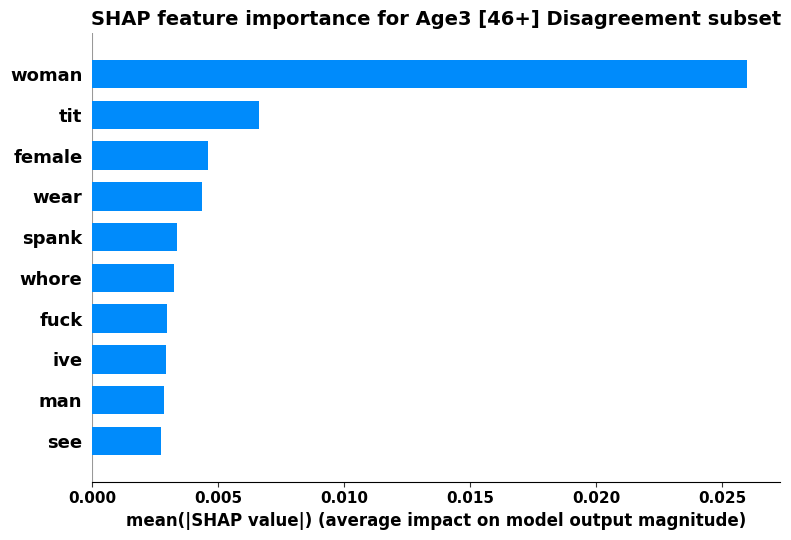

In [47]:
fig = plt.figure(figsize=(6,6))

shap.summary_plot(shap_values = shapley_values_train_a3, 
                  features = X_train_a3.toarray(),
                  feature_names = vec_a3.get_feature_names_out(),
                  plot_type='bar',
                  max_display=10,
                  show=False)
plt.title("SHAP feature importance for Age3 [46+] Disagreement subset",fontsize=14, color='black', fontweight='bold')
plt.xlabel("mean(|SHAP value|) (average impact on model output magnitude)", fontsize=12, color='black', fontweight='bold')
plt.xticks(color='black', fontweight='bold')
plt.yticks(color='black', fontweight='bold')
plt.tight_layout()
plt.show()

Spearman correlation

In [48]:
from scipy.stats import spearmanr

In [49]:
shap_mean_a1=top_features_a1['Shapley']
shap_mean_a2=top_features_a2['Shapley']
correlation_a12,p_value_a12=spearmanr(shap_mean_a1,shap_mean_a2)
# Print results
print("Spearman Rank Correlation between age1  and age2 annotators")
print(f"Spearman Rank Correlation coefficient: {correlation_a12:.4f}")
print(f"p-value: {p_value_a12:.4f}")

Spearman Rank Correlation between age1  and age2 annotators
Spearman Rank Correlation coefficient: 0.3333
p-value: 0.3466


In [50]:
shap_mean_a1=top_features_a1['Shapley']
shap_mean_a3=top_features_a3['Shapley']
correlation_a13,p_value_a13=spearmanr(shap_mean_a1,shap_mean_a3)
# Print results
print("Spearman Rank Correlation between age1  and age3 annotators")
print(f"Spearman Rank Correlation coefficient: {correlation_a13:.4f}")
print(f"p-value: {p_value_a13:.4f}")

Spearman Rank Correlation between age1  and age3 annotators
Spearman Rank Correlation coefficient: 0.6121
p-value: 0.0600


In [51]:
shap_mean_a2=top_features_a2['Shapley']
shap_mean_a3=top_features_a3['Shapley']
correlation_a23,p_value_a23=spearmanr(shap_mean_a2,shap_mean_a3)
# Print results
print("Spearman Rank Correlation between age2  and age3 annotators")
print(f"Spearman Rank Correlation coefficient: {correlation_a23:.4f}")
print(f"p-value: {p_value_a23:.4f}")

Spearman Rank Correlation between age2  and age3 annotators
Spearman Rank Correlation coefficient: 0.2970
p-value: 0.4047
